In [1]:
# allow to import modules from the project root directory
import sys
import os
# Add the project root directory to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../..')))

In [18]:
import numpy as np
import gymnasium as gym
from gymnasium import spaces
import random
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from src.ParObsSnakeEnv import SnakeEnv
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [3]:
class Actor(nn.Module):
    def __init__(self, num_inputs, num_actions):
        super(Actor, self).__init__()
        self.num_actions = num_actions
        self.Dropout = nn.Dropout(p=0.4)
        self.fc1 = nn.Linear(num_inputs, 128)
        self.fc2 = nn.Linear(128, num_actions)

    def forward(self, state):
        x = torch.relu(self.fc1(state))
        x = self.Dropout(x)
        logits = self.fc2(x)
        return logits
    
    def choose_action(self, state):
        state_tensor = torch.FloatTensor(state).unsqueeze(0)
        logits = self.forward(state_tensor)
        action_probs = F.softmax(logits, dim=1)
        action = np.random.choice(self.num_actions, p=action_probs.detach().numpy()[0])
        return action, action_probs

class Critic(nn.Module):
    def __init__(self, num_inputs):
        super(Critic, self).__init__()
        self.fc1 = nn.Linear(num_inputs, 128)
        self.fc2 = nn.Linear(128, 1)

    def forward(self, state):
        x = torch.relu(self.fc1(state))
        value = self.fc2(x)
        return value

In [9]:
env = SnakeEnv(grid_size=10, interact=False)
num_actions = env.action_space.n
num_inputs = env.observation_space.shape[0]

In [12]:
gamma = 0.99
actor_lr = 0.0001
critic_lr = 0.0001
num_episodes = 3000

In [13]:
actor = Actor(num_inputs, num_actions)
critic = Critic(num_inputs)
criterion = nn.MSELoss()
episode_reward_list = list()

In [14]:
# Initialize optimizers and learning rate schedulers
actor_optimizer = torch.optim.Adam(actor.parameters(), lr=0.001)
critic_optimizer = torch.optim.Adam(critic.parameters(), lr=0.001)

In [15]:
# Initialize lists to store statistics
actor_losses = []
critic_losses = []
episode_rewards = []

# Training loop
for episode in tqdm(range(num_episodes), desc="Training Episodes"):
    state = env.reset()
    done = False
    episode_reward = 0

    while not done:
        action, action_probs = actor.choose_action(state)
        next_state, reward, done, _ = env.step(action)
        episode_reward += reward

        if done:
            reward = -1

        state_tensor = torch.FloatTensor(state).unsqueeze(0)
        next_state_tensor = torch.FloatTensor(next_state).unsqueeze(0)

        value = critic(state_tensor)
        next_value = critic(next_state_tensor)

        target_value = reward + gamma * next_value * (1 - int(done))
        advantage = target_value - value

        actor_loss = -torch.log(action_probs[0, action]) * advantage.item()
        critic_loss = criterion(value, target_value.detach())

        actor_optimizer.zero_grad()
        critic_optimizer.zero_grad()

        actor_loss.backward()
        critic_loss.backward()

        actor_optimizer.step()
        critic_optimizer.step()

        state = next_state

    # Store statistics
    actor_losses.append(actor_loss.item())
    critic_losses.append(critic_loss.item())
    episode_rewards.append(episode_reward)

Training Episodes: 100%|██████████| 3000/3000 [08:00<00:00,  6.25it/s]


In [16]:
# save the models 
torch.save(actor.state_dict(), "../../models/actor.pth")
torch.save(critic.state_dict(), "../../models/critic.pth")

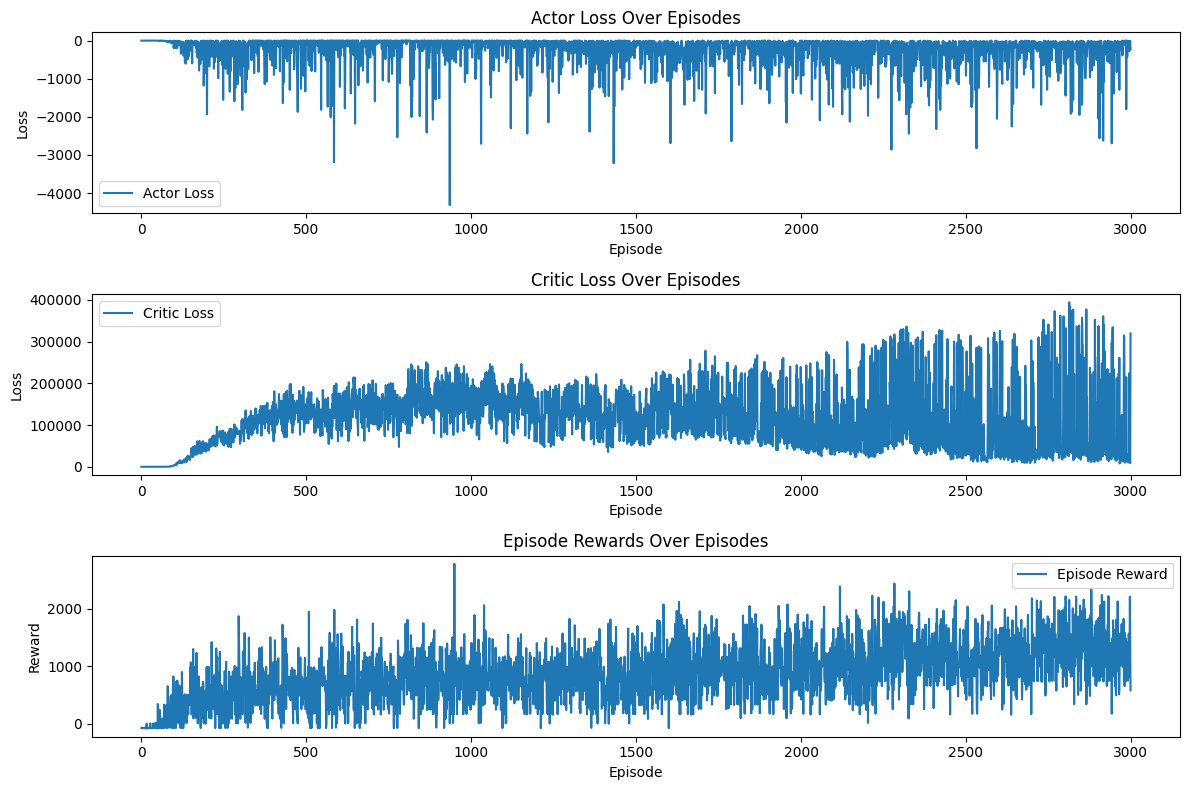

In [17]:
import matplotlib.pyplot as plt
# Plotting the statistics
plt.figure(figsize=(12, 8))

# Plot actor losses
plt.subplot(3, 1, 1)
plt.plot(actor_losses, label='Actor Loss')
plt.xlabel('Episode')
plt.ylabel('Loss')
plt.title('Actor Loss Over Episodes')
plt.legend()

# Plot critic losses
plt.subplot(3, 1, 2)
plt.plot(critic_losses, label='Critic Loss')
plt.xlabel('Episode')
plt.ylabel('Loss')
plt.title('Critic Loss Over Episodes')
plt.legend()

# Plot episode rewards
plt.subplot(3, 1, 3)
plt.plot(episode_rewards, label='Episode Reward')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Episode Rewards Over Episodes')
plt.legend()

plt.tight_layout()
plt.show()

In [4]:
from src.utils import compute_metrics

In [10]:
actor = Actor(num_inputs, num_actions)
actor.load_state_dict(torch.load("../../models/actor.pth"))

<All keys matched successfully>

In [11]:
env = SnakeEnv(grid_size=20)

In [12]:
stats = compute_metrics(actor, env)

Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 76
Reward: 1
Reward: 1
Reward: 1
Reward: 76
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 76
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 76
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 76
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 76
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 76
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Reward: 1
Rew

In [14]:
stats

{'snake_lengths': [18, 14, 35, 18, 24, 28, 28, 32, 11, 43],
 'snake_lifetimes': [239, 176, 480, 199, 281, 428, 403, 485, 130, 654],
 'episode_rewards': [1434,
  1067,
  2902,
  1380,
  1888,
  2363,
  2346,
  2678,
  802,
  3654]}

In [16]:
snake_lengths = stats['snake_lengths']
snake_lifetimes = stats['snake_lifetimes']
episode_rewards = stats['episode_rewards']

Average Snake Length: 25.1
Average Snake Lifetime: 347.5
Average Episode Reward: 2051.4


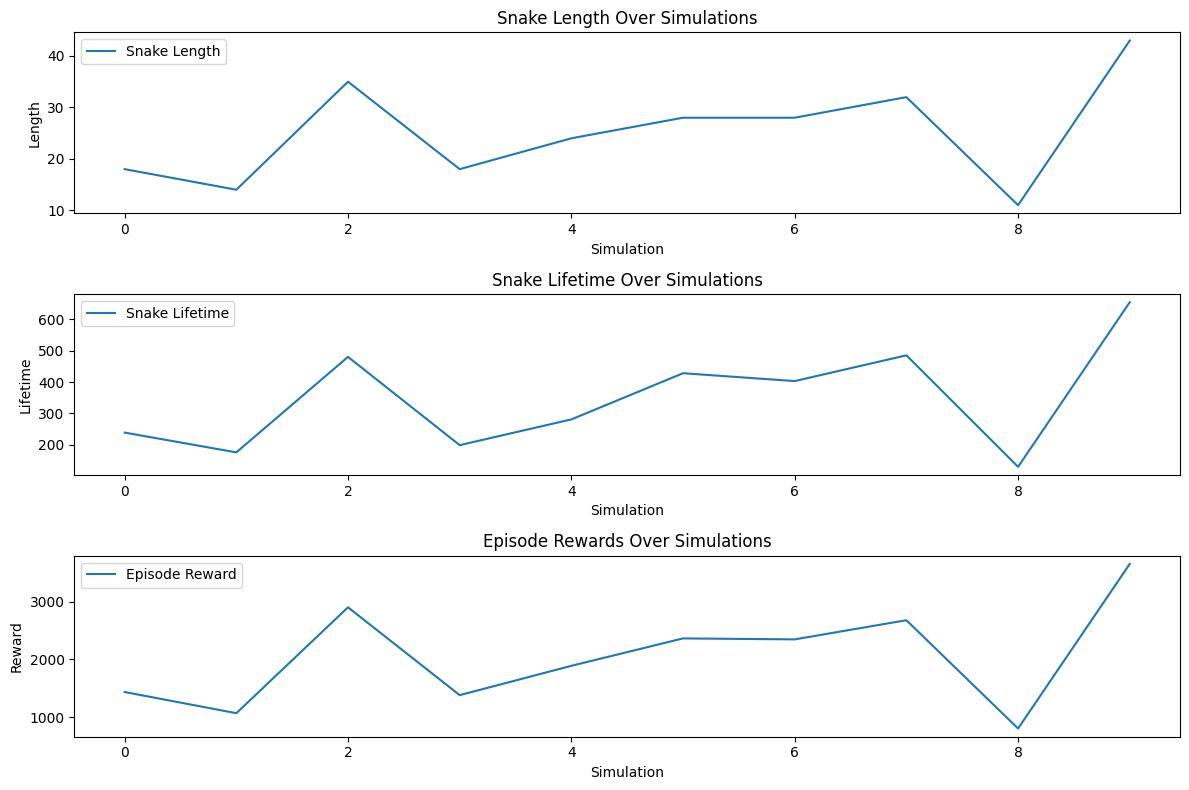

In [19]:
# Print metrics
print("Average Snake Length:", np.mean(snake_lengths))
print("Average Snake Lifetime:", np.mean(snake_lifetimes))
print("Average Episode Reward:", np.mean(episode_rewards))

# Plotting the metrics
plt.figure(figsize=(12, 8))

# Plot snake lengths
plt.subplot(3, 1, 1)
plt.plot(snake_lengths, label='Snake Length')
plt.xlabel('Simulation')
plt.ylabel('Length')
plt.title('Snake Length Over Simulations')
plt.legend()

# Plot snake lifetimes
plt.subplot(3, 1, 2)
plt.plot(snake_lifetimes, label='Snake Lifetime')
plt.xlabel('Simulation')
plt.ylabel('Lifetime')
plt.title('Snake Lifetime Over Simulations')
plt.legend()

# Plot episode rewards
plt.subplot(3, 1, 3)
plt.plot(episode_rewards, label='Episode Reward')
plt.xlabel('Simulation')
plt.ylabel('Reward')
plt.title('Episode Rewards Over Simulations')
plt.legend()

plt.tight_layout()
plt.show()